In [36]:
import pandas as pd
import numpy as np

In [37]:
homelessness = pd.read_csv("homelessness.csv", index_col=0)

homelessness.describe()
print(homelessness.shape)
display(homelessness.head())
homelessness.describe()
homelessness.shape
homelessness.values
homelessness.columns
homelessness.index

(51, 5)


,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype='int64')

In [38]:
homelessness_ind = homelessness.sort_values(by="individuals", ascending=True)
display(homelessness_ind.head())

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


In [39]:
homelessness_fam = homelessness.sort_values(by="family_members", ascending=False)
display(homelessness_fam.head())

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666


In [40]:
homelessness_reg_fam = homelessness.sort_values(
    by=["region", "family_members"], ascending=[True, False]
)
display(homelessness_reg_fam.head())

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


In [41]:
state_fam = homelessness[["state", "family_members"]]
display(state_fam.head())

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


In [42]:
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]
display(ind_gt_10k.head())
print("\nSorted Version")
ind_gt_10k = homelessness[homelessness["individuals"] > 10000].sort_values(
    "individuals", ascending=True
)

display(ind_gt_10k.head())

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666



Sorted Version


,region,state,individuals,family_members,state_pop
37,Pacific,Oregon,11139.0,3337.0,4181886
47,Pacific,Washington,16424.0,5880.0,7523869
43,West South Central,Texas,19199.0,6111.0,28628666
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351


In [43]:
mountain_reg = homelessness[homelessness["region"] == "Mountain"]
display(mountain_reg.head(10))

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
5,Mountain,Colorado,7607.0,3250.0,5691287
12,Mountain,Idaho,1297.0,715.0,1750536
26,Mountain,Montana,983.0,422.0,1060665
28,Mountain,Nevada,7058.0,486.0,3027341
31,Mountain,New Mexico,1949.0,602.0,2092741
44,Mountain,Utah,1904.0,972.0,3153550
50,Mountain,Wyoming,434.0,205.0,577601


In [44]:
fam_It_1k_pac = homelessness[
    (homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")
]
display(fam_It_1k_pac.head())

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


In [45]:
homeless_pop = homelessness[homelessness["state_pop"] < 2000000]
display(homeless_pop.head())

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
11,Pacific,Hawaii,4131.0,2399.0,1420593
12,Mountain,Idaho,1297.0,715.0,1750536


In [46]:
south_mid_atlantic = homelessness[
    homelessness["region"].isin(["South Atlantic", "Mid-Atlantic"])
]
display(south_mid_atlantic.head(12))

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317
10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,South Atlantic,South Carolina,3082.0,851.0,5084156


In [47]:
mojave_homelessness = homelessness[
    homelessness["state"].isin(["California", "Nevada", "Arizona", "Utah"])
]
display(mojave_homelessness.head())

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


In [48]:
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]
display(homelessness.head())

,region,state,individuals,family_members,state_pop,total
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0
1,Pacific,Alaska,1434.0,582.0,735139,2016.0
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0
4,Pacific,California,109008.0,20964.0,39461588,129972.0


In [49]:
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]
display(homelessness.head())

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [50]:
homelessness["indiv_per_10k"] = (
    homelessness["individuals"] / homelessness["state_pop"] * 10000
)
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)
display(high_homelessness_srt[["state", "indiv_per_10k"]])

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


In [51]:
sales = pd.read_csv("sales_subset.csv", index_col=0)
# Print the head of the sales DataFrame
print(sales.head())
print("----------------------------------------------------------------------------")
# Print the info about the sales DataFrame
print(sales.info())
print("----------------------------------------------------------------------------")
# Print the mean of weekly_sales
print(sales["weekly_sales"].mean())
print("----------------------------------------------------------------------------")
# Print the median of weekly_sales
print(sales["weekly_sales"].median())
print("----------------------------------------------------------------------------")
# Print the maximum of the date column
print(sales["date"].max())
print("----------------------------------------------------------------------------")
# Print the minimum of the date column
print(sales["date"].min())

   store type  department        date  weekly_sales  is_holiday  \
0      1    A           1  2010-02-05      24924.50       False   
1      1    A           1  2010-03-05      21827.90       False   
2      1    A           1  2010-04-02      57258.43       False   
3      1    A           1  2010-05-07      17413.94       False   
4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                ---------

In [52]:
sales_1_1 = sales[(sales["department"] == 1) & (sales["store"] == 1)]

# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date", ascending=True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales["weekly_sales"].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


In [53]:
store_types = sales.drop_duplicates(subset=["store", "type"])
store_types.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [54]:
store_depts = sales.drop_duplicates(subset=["store", "department"])
store_depts.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [55]:
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")
print(holiday_dates["date"])

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object


In [56]:
# Count the number of stores of each store type
store_type_counts = store_types["type"].value_counts()
print(store_type_counts)
print("----------------------------------------------------------------------------")
# Count the proportion of stores of each store type
store_type_proportion = store_types["type"].value_counts(normalize=True)
print(store_type_proportion)
print("----------------------------------------------------------------------------")
# Count the number of different departments, sorting the counts in descending order
dept_counts = store_depts["department"].value_counts().sort_values(ascending=False)
print(dept_counts)
print("----------------------------------------------------------------------------")
# Count the proportion of different departments, sorting the proportions in descending order
dept_proportion = (
    store_depts["department"].value_counts(normalize=True).sort_values(ascending=False)
)
print(dept_proportion)

type
A    11
B     1
Name: count, dtype: int64
----------------------------------------------------------------------------
type
A    0.916667
B    0.083333
Name: proportion, dtype: float64
----------------------------------------------------------------------------
department
1     12
3     12
5     12
6     12
7     12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64
----------------------------------------------------------------------------
department
1     0.012917
3     0.012917
5     0.012917
6     0.012917
7     0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


In [57]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()
# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()
# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()
# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [58]:
# For each store type, aggregate weekly_sales to calculate min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg(
    ["min", "max", "mean", "median"]
)
# Print the aggregated sales statistics
print("Sales Statistics by Store Type:")
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l to calculate min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg(
    ["min", "max", "mean", "median"]
)
# Print the aggregated unemployment and fuel price statistics
print("\nUnemployment and Fuel Price Statistics by Store Type:")
print(unemp_fuel_stats)

Sales Statistics by Store Type:
         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08

Unemployment and Fuel Price Statistics by Store Type:
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


In [59]:
temperatures = pd.read_csv("temperatures.csv", index_col=0)

# Print the head of the temperatures DataFrame
print(temperatures)

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

             date     city        country  avg_temp_c
0      2000-01-01  Abidjan  Côte D'Ivoire      27.293
1      2000-02-01  Abidjan  Côte D'Ivoire      27.685
2      2000-03-01  Abidjan  Côte D'Ivoire      29.061
3      2000-04-01  Abidjan  Côte D'Ivoire      28.162
4      2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...      ...            ...         ...
16495  2013-05-01     Xian          China      18.979
16496  2013-06-01     Xian          China      23.522
16497  2013-07-01     Xian          China      25.251
16498  2013-08-01     Xian          China      24.528
16499  2013-09-01     Xian          China         NaN

[16500 rows x 4 columns]
               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.5

First few rows of the dataset:
         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56

Number of avocados sold by size:
size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64


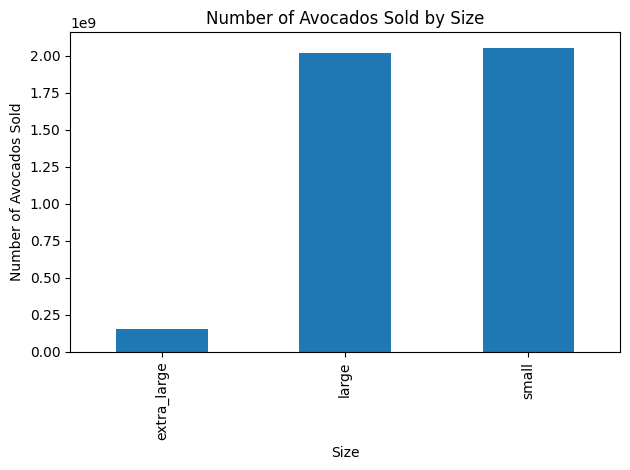

In [60]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Load the data
avocados = pd.read_pickle("avoplotto.pkl")

# Look at the first few rows of the data
print("First few rows of the dataset:")
print(avocados.head())

# Get the total number of avocados sold for each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
print("\nNumber of avocados sold by size:")
print(nb_sold_by_size)
nb_sold_by_size.plot(kind="bar", title="Number of Avocados Sold by Size")

# Display the plot
plt.xlabel("Size")
plt.ylabel("Number of Avocados Sold")
plt.tight_layout()
plt.show()

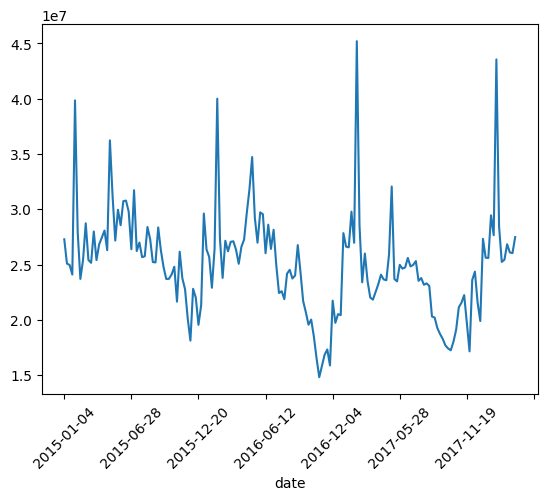

In [61]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", rot=45)
# Show the plot
plt.show()

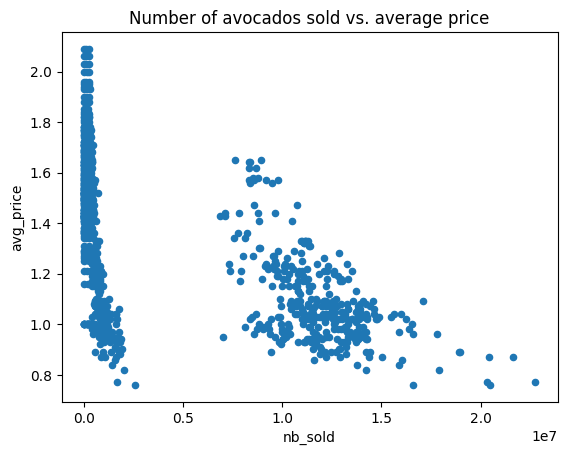

In [62]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(
    x="nb_sold",
    y="avg_price",
    kind="scatter",
    title="Number of avocados sold vs. average price",
)
# Show the plot
plt.show()

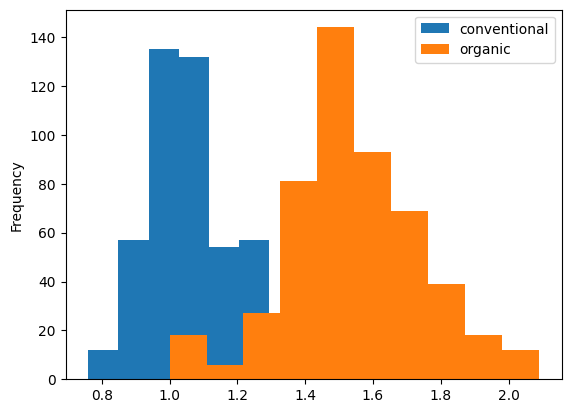

In [63]:
# Histogram of conventional avg_price
avocados[avocados["type"] == "conventional"]["avg_price"].plot(kind="hist")
# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].plot(kind="hist")
# Add a legend
plt.legend(["conventional", "organic"])
# Show the plot
plt.show()

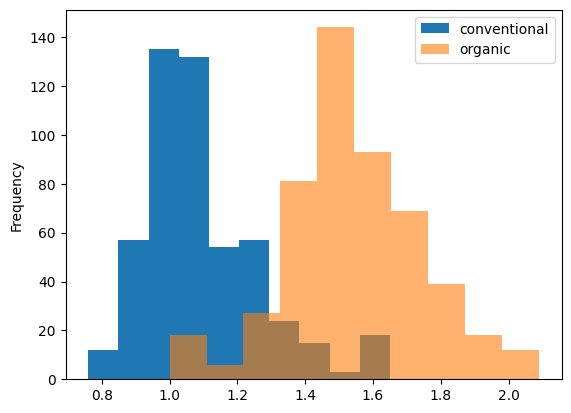

In [64]:
# Histogram of conventional avg_price
avocados[avocados["type"] == "conventional"]["avg_price"].plot(kind="hist")
# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].plot(kind="hist", alpha=0.6)
# Add a legend
plt.legend(["conventional", "organic"])
# Show the plot
plt.show()

     Unnamed: 0   date   type   year  avg_price   size  nb_sold
52        False  False  False  False      False  False    False
53        False  False  False  False      False  False    False
54        False  False  False  False      False  False    False
55        False  False  False  False      False  False    False
56        False  False  False  False      False  False    False
..          ...    ...    ...    ...        ...    ...      ...
944       False  False  False  False      False  False    False
945       False  False  False  False      False  False    False
946       False  False  False  False      False  False    False
947       False  False  False  False      False  False    False
948       False  False  False  False      False  False    False

[312 rows x 7 columns]
Unnamed: 0    False
date          False
type          False
year          False
avg_price     False
size          False
nb_sold       False
dtype: bool


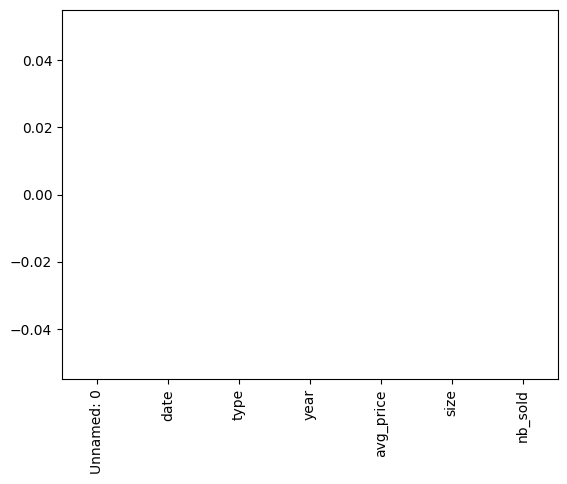

Unnamed: 0    False
date          False
type          False
year          False
avg_price     False
size          False
nb_sold       False
dtype: bool


In [65]:
avocados_2016 = pd.read_csv("avocados_2016.csv", index_col=0)

# Check individual values for missing values
print(avocados_2016.isna())
# Check each column for missing values
print(avocados_2016.isna().any())
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")
# Show plot
plt.show()
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()
# Check if any columns contain missing values
print(avocados_complete.isna().any())

In [66]:
gdp_data = pd.read_csv("WorldBank_GDP.csv", index_col=0)

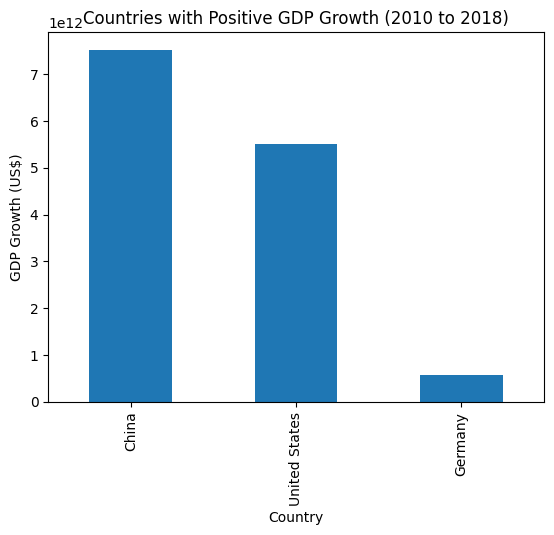

In [67]:
# Which country’s GDP is growing during the Year 2010 and Year 2018?

# Filter data for the years 2010 and 2018
gdp_2010_2018 = gdp_data[gdp_data["Year"].isin([2010, 2018])]

# Pivot the data to make countries as rows and years as columns
gdp_pivot = gdp_2010_2018.pivot(columns="Year", values="GDP")

# Drop rows with missing values for either year
gdp_pivot = gdp_pivot.dropna()

# Calculate GDP growth from 2010 to 2018
gdp_pivot["Growth"] = gdp_pivot[2018] - gdp_pivot[2010]

# Filter countries with positive growth
growing_countries = gdp_pivot[gdp_pivot["Growth"] > 0]

# Plot the GDP growth for these countries
growing_countries["Growth"].sort_values(ascending=False).plot(kind="bar")
plt.title("Countries with Positive GDP Growth (2010 to 2018)")
plt.ylabel("GDP Growth (US$)")
plt.xlabel("Country")
plt.show()

In [68]:
avg_temp_c = temperatures.groupby("country")["avg_temp_c"].mean().reset_index()

print(avg_temp_c)
print(avg_temp_c.max())
temp_country2030 = avg_temp_c[
    (avg_temp_c["avg_temp_c"] >= 20) & (avg_temp_c["avg_temp_c"] <= 30)
][["country", "avg_temp_c"]]
print(temp_country2030)
print(temp_country2030.count())

                               country  avg_temp_c
0                          Afghanistan   15.525756
1                               Angola   24.387659
2                            Australia   16.028104
3                           Bangladesh   26.164378
4                               Brazil   23.906030
5                                Burma   27.514213
6                               Canada    6.637158
7                                Chile    6.345768
8                                China   12.983107
9                             Colombia   21.649607
10  Congo (Democratic Republic Of The)   24.504963
11                       Côte D'Ivoire   26.971024
12                  Dominican Republic   26.852800
13                               Egypt   22.044807
14                            Ethiopia   18.425378
15                              France   11.514274
16                             Germany   10.152421
17                               India   26.633255
18                           In

In [69]:
temp_thailand = temperatures[temperatures["country"] == "Thailand"]
temp_thailand

,date,city,country,avg_temp_c
1320,2000-01-01,Bangkok,Thailand,25.980
1321,2000-02-01,Bangkok,Thailand,26.564
1322,2000-03-01,Bangkok,Thailand,28.626
1323,2000-04-01,Bangkok,Thailand,28.881
1324,2000-05-01,Bangkok,Thailand,28.978
...,...,...,...,...
1480,2013-05-01,Bangkok,Thailand,30.927
1481,2013-06-01,Bangkok,Thailand,28.771
1482,2013-07-01,Bangkok,Thailand,28.155
1483,2013-08-01,Bangkok,Thailand,28.351


In [70]:
temp_thailand_20052010 = temp_thailand[
    temp_thailand["date"].between("2005-01-01", "2010-01-01")
]
display(temp_thailand_20052010)

# Average Temperature during that Period
avg_temp_thailand_200520010 = temp_thailand_20052010["avg_temp_c"].mean()
print(
    "The avg. temp of Thailand during 2005-2010 is ",
    avg_temp_thailand_200520010,
    "Celsius.",
)

,date,city,country,avg_temp_c
1380,2005-01-01,Bangkok,Thailand,25.323
1381,2005-02-01,Bangkok,Thailand,28.225
1382,2005-03-01,Bangkok,Thailand,28.825
1383,2005-04-01,Bangkok,Thailand,30.210
1384,2005-05-01,Bangkok,Thailand,30.023
...,...,...,...,...
1436,2009-09-01,Bangkok,Thailand,28.308
1437,2009-10-01,Bangkok,Thailand,27.564
1438,2009-11-01,Bangkok,Thailand,26.533
1439,2009-12-01,Bangkok,Thailand,25.973


The avg. temp of Thailand during 2005-2010 is  27.76014754098361 Celsius.
